# Featurization and Model Tuning
## Data Description :
The concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory.
### Domain  : Cement manufacturing/Civil Engineering
### Context : 
The concrete compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate

## Importing relevent libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('concrete.csv')

In [3]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
print('Our Dataset has {} rows and columns {}'.format(raw_data.shape[0],raw_data.shape[1]))

Our Dataset has 1030 rows and columns 9


## Exploratory data quality report

### Univariate analysis

#### Data types and Names of the independent attributes

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Our data has 9 columns, which are numeric and non-null in nature.

#### Central Tendencies (Mean, Min- Max(Range)), Standard Deviation, Quantiles

In [6]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Independent variables range  measured in kg in a m3 mixture :

cement - 102 to 540,
slag - 0 to 359,
ash - 0 to 200,
water - 121 to 247,
superplastic - 0 to 32,
coarseagg - 801 to 1145,
age - 1 to 365,
strength - 2.3 to 87 

#### Let's check for duplicates in our data

In [7]:
print("Numbder of duplicate rows in our data is {}".format(raw_data.duplicated().sum()))

Numbder of duplicate rows in our data is 25


In [8]:
new_data=raw_data.drop_duplicates(subset=None,keep='first',inplace=False)

Removing drop_duplicates from pandas to eliminate duplicate values and retain only the first occuerence of the duplicates for analysis

In [9]:
print ('After Removing Duplicates Our Dataset has {} rows and columns {}'.format(new_data.shape[0],new_data.shape[1]))

After Removing Duplicates Our Dataset has 1005 rows and columns 9


### Histogram

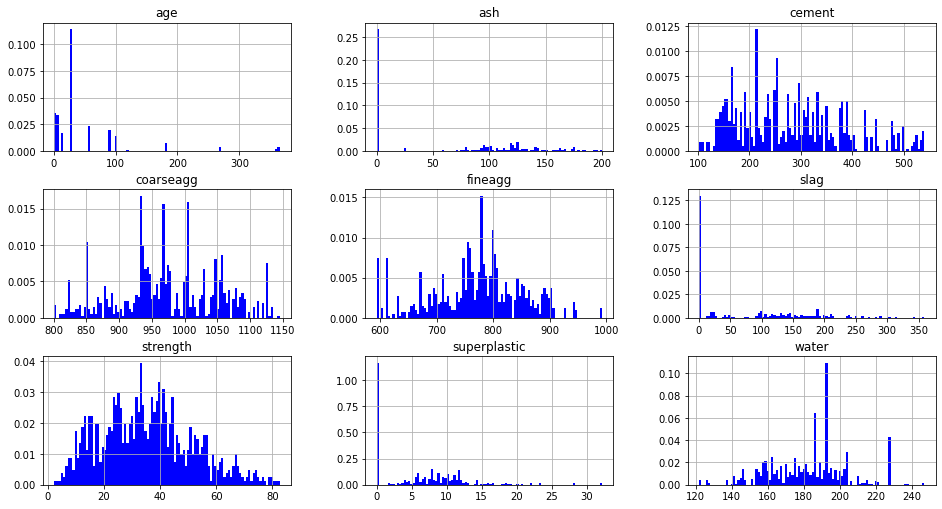

In [10]:
columns=list(new_data)
new_data[columns].hist(stacked=True,density=True, bins=100,color='blue', figsize=(16,30), layout=(10,3));

1. From the above Histogram we could see that cement, coarseag,fineagg, strength and water are almost normally distributed.
2. Age , Ash, superlastic are slightly skewed.

#### Data Skewness & Distribution of curves

In [11]:
new_data.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

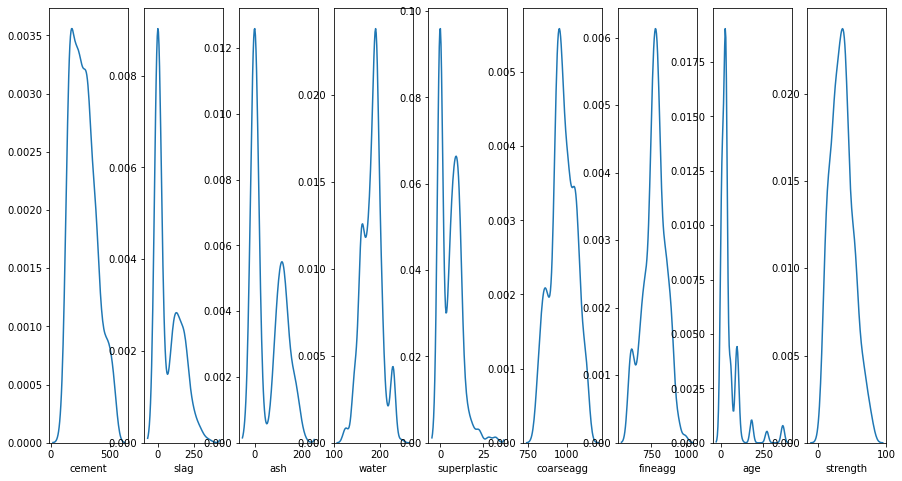

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64


In [12]:
fig,ax=plt.subplots(1,9,figsize=(15,8))
sns.distplot(new_data['cement'],ax=ax[0],kde=True,hist=False)
sns.distplot(new_data['slag'],ax=ax[1],kde=True,hist=False)
sns.distplot(new_data['ash'],ax=ax[2],kde=True,hist=False)
sns.distplot(new_data['water'],ax=ax[3],kde=True,hist=False)
sns.distplot(new_data['superplastic'],ax=ax[4],kde=True,hist=False)
sns.distplot(new_data['coarseagg'],ax=ax[5],kde=True,hist=False)
sns.distplot(new_data['fineagg'],ax=ax[6],kde=True,hist=False)
sns.distplot(new_data['age'],ax=ax[7],kde=True,hist=False)
sns.distplot(new_data['strength'],ax=ax[8],kde=True,hist=False)
plt.show()
print(new_data.skew())

In terms of distribution slag, ash, water, superplastic, coarseagg, fineagg , age are all multi gaussian which means they have multiple peaks and valleys.
Strength seems to be normally distributed, cement has a slightly sharp multiple peaks.

#### Tails
1. Cement seems to be normally distibuted
2. slag is slightly skewed towads right
3. ash is normally distributed
4. water is slighly skewd towards right
5. superlastic is skewd towards right
6. coarseagg is normally distributed
7. fineagg is normally distributed
8. age is slighly skewed positively 
9. strength is normally distributed

In [13]:
new_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

No null values present in our dataset.

#### Check the presence of outliers through box plot

Outliers are extreme values present in the data.There are outliers in our data for some columns as you can see from the below boxplot, Outliers have an impact on algorithms and the datasets. We should find ways to fix outliers.

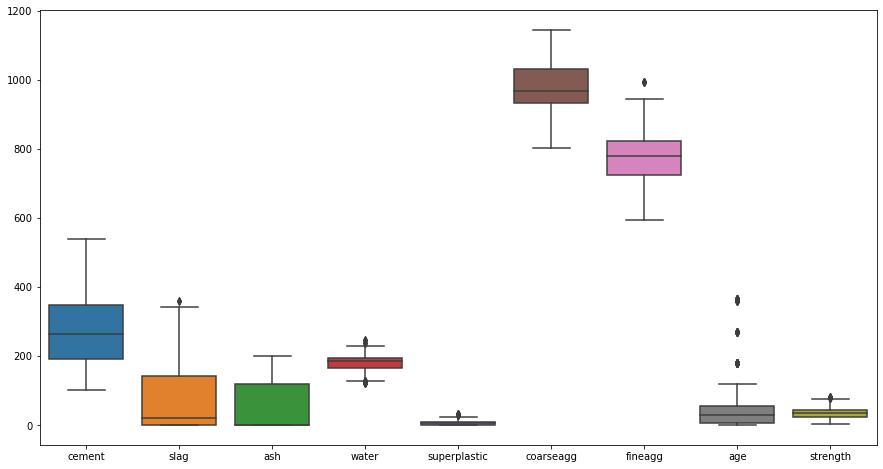

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=new_data)

## Multivariate analysis

#### Traget Column call out :

##### In this dataset our variable of interest is the strength column. It is a continous variable which depends on various other parameters in evaluation of the concrete mixture.

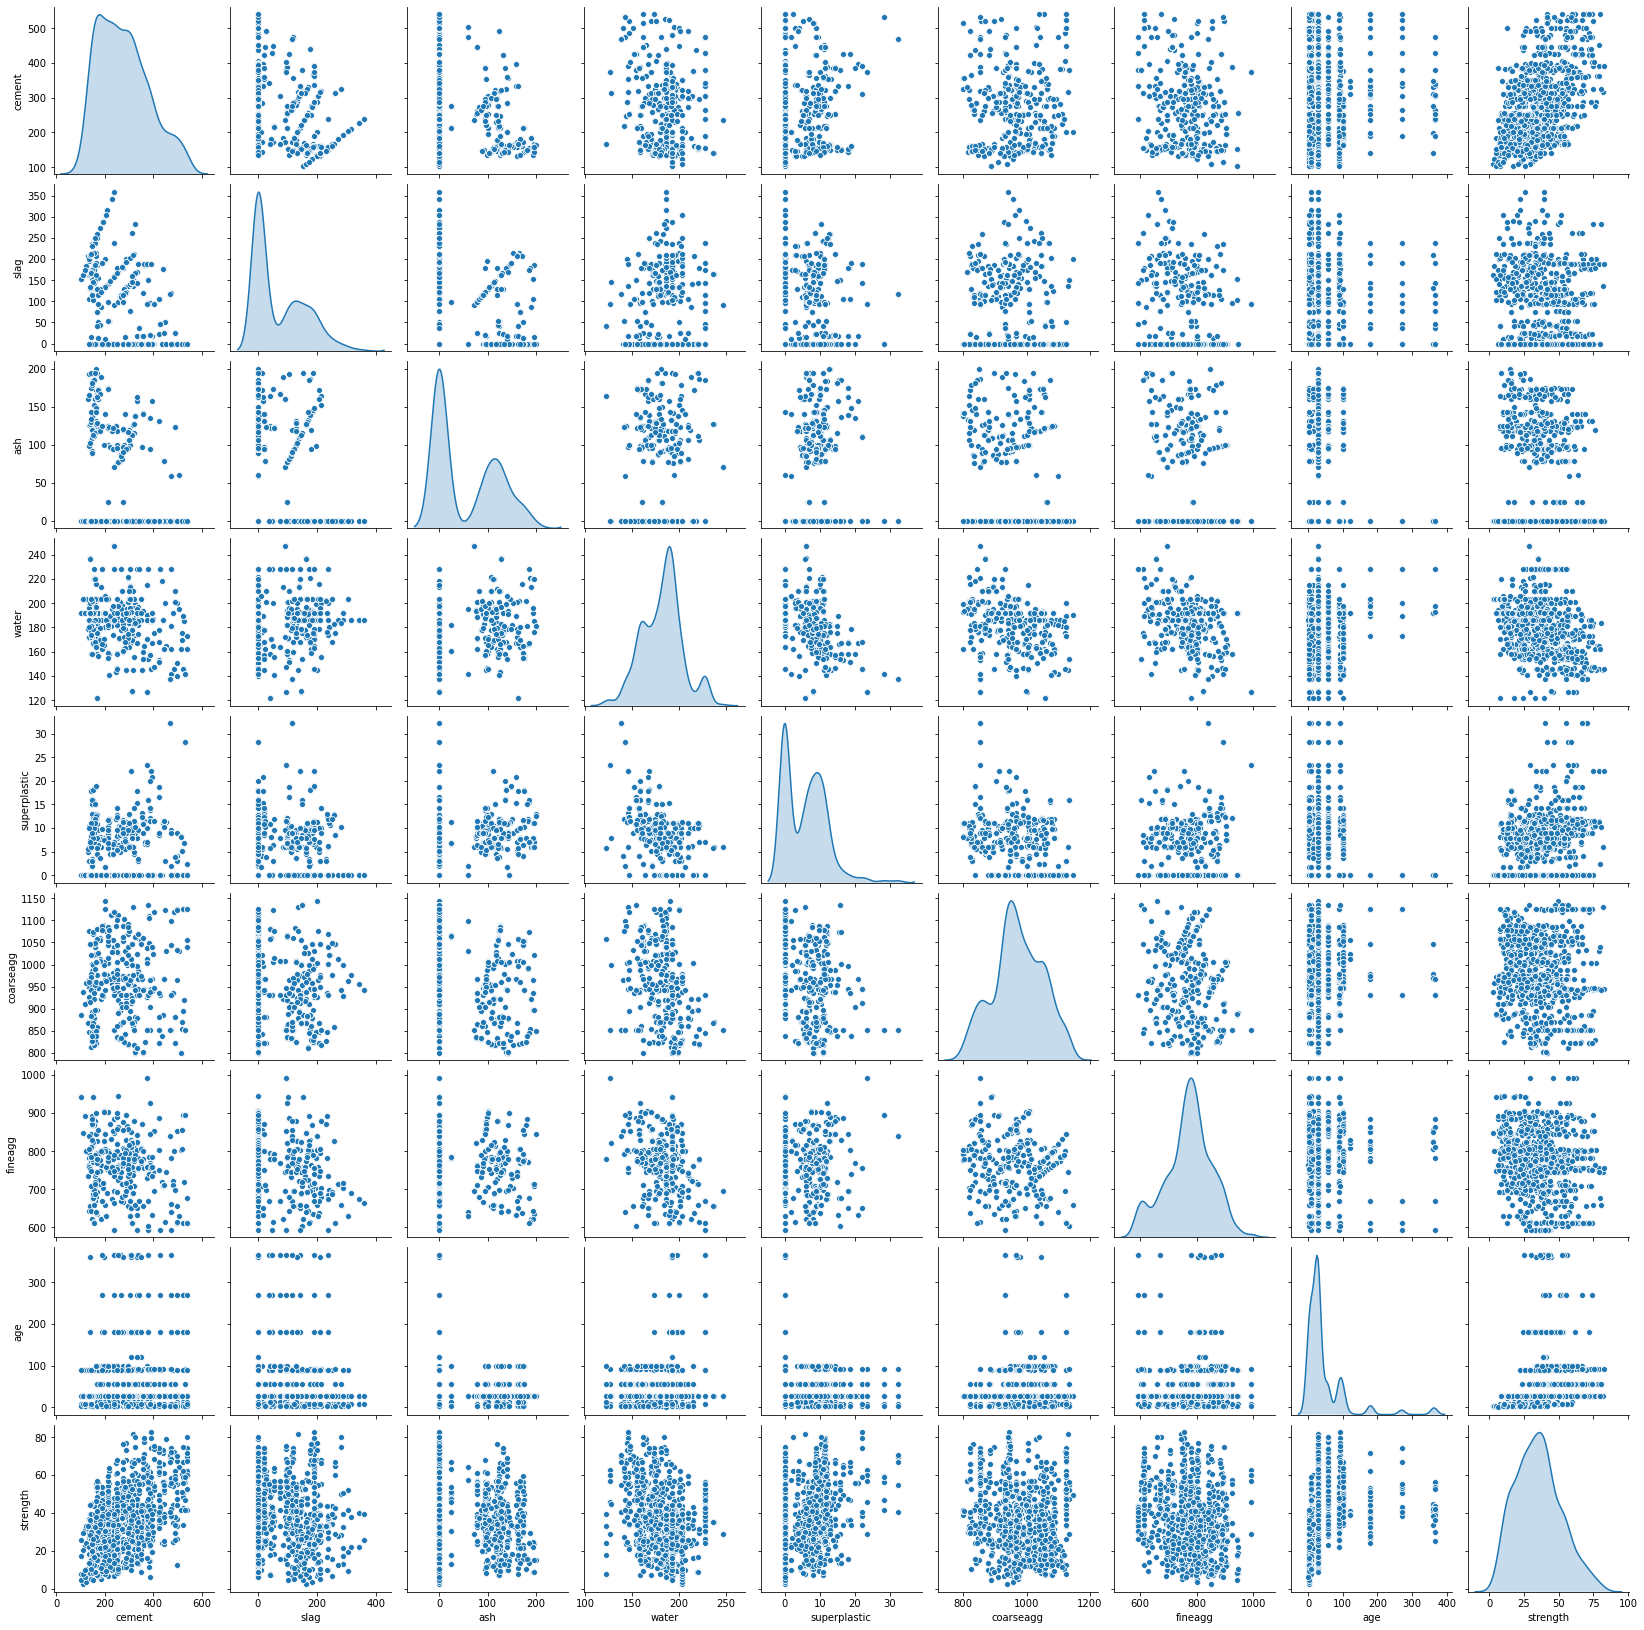

In [15]:
sns.pairplot(new_data,hue_order=new_data['strength'],diag_kind='kde');

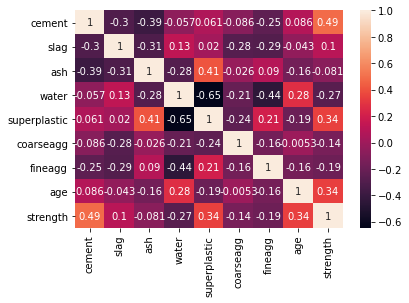

In [16]:
cor=new_data.corr()
sns.heatmap(cor,annot=True);

##### Pair plot analysis:
1. Along the Diagonal, our data has around 2-3 gaussians for all the predictor variables. We can do a cluster analysis to understand any grouping or hidden pattern available in the dataset.
2. Our predictors have some reationship and dependencies with target. 
3. From the correlation matrix we could infer that , our variables have less correraltion between each other. This is good, as most ML algorithms assume variables are independent of each other for better prediction.

##### Inter Quantile Range Calculation

In [17]:
Q1=new_data.quantile(0.25)
Q3=new_data.quantile(0.75)

IQR=Q3-Q1
IQR

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64

In [18]:
rev_data= new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
rev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        911 non-null    float64
 1   slag          911 non-null    float64
 2   ash           911 non-null    float64
 3   water         911 non-null    float64
 4   superplastic  911 non-null    float64
 5   coarseagg     911 non-null    float64
 6   fineagg       911 non-null    float64
 7   age           911 non-null    int64  
 8   strength      911 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 71.2 KB


After outlier removal and duplicates removal, now we are left with 911 records in our dataset.

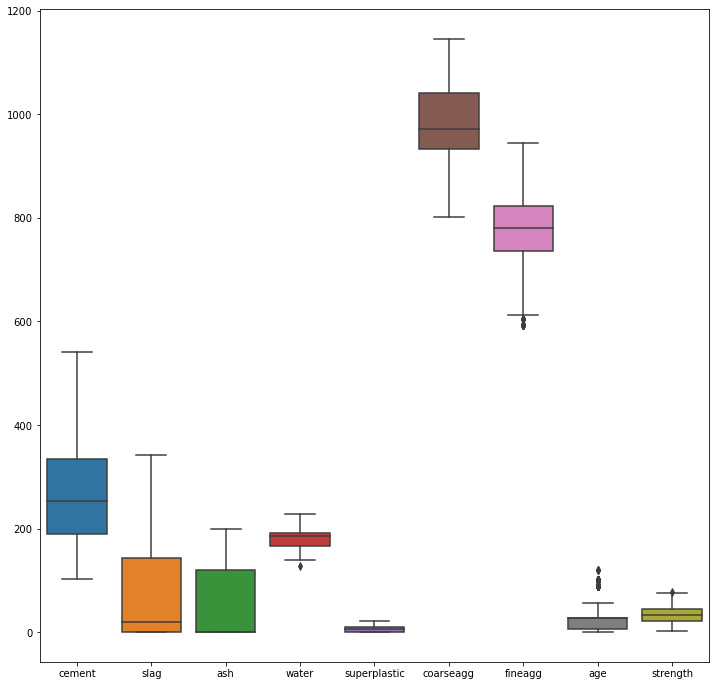

In [20]:
plt.figure(figsize=(12,12))
sns.boxplot(data=rev_data)
plt.show()

Now, we do see some outliers again in the final data , but they're not real noise. These are caused because our central tendencies and distribution has been changed / altered after removal of ouliers , and these may not be considered as ouliers now.

## Feature Engineering techniques

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.decomposition import PCA
from scipy.stats import zscore

#### We will use PCA for dimensionality reduction 

To identify important features among all , we shall do principal component analysis to see the varience captured by each component. And decide how many features might be really required to predict the strength of the concrete mixture.

In [22]:
pca_data = rev_data.copy()

In [23]:
pca_data = pca_data.apply(zscore)

Scaling is an important aspect in PCA as different unit of measurement affects the calculation of new axis that PCA creates. Standardization or normalization will help create the right Principal compoenents with giving every feature the right weightage.

In our dataset though, all our independent features are measured in kgs, all have different magnitude, hence scaling the dataset before using PCA is neccessary.

In [24]:
Scaler=StandardScaler()
X_PCA=pca_data.drop(['strength'],axis=1)
Y_PCA=pca_data['strength']
PC=PCA(n_components=8,random_state=12)
comp_features=PC.fit(X_PCA)

Implementing PCA with all independent features to see the overall varience captured by each component.

#### Displaying the covarience Matrix for each compoenent

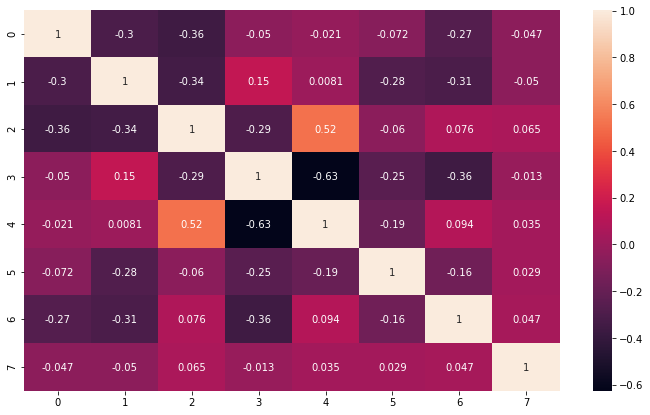

In [25]:
covmatrix=np.cov(X_PCA,rowvar=False)
plt.figure(figsize=(12,7))
sns.heatmap(covmatrix,annot=True)

In [26]:
print("The Eigen Values\n")
print(PC.explained_variance_)
print("\nThe Eigen Vectors\n")
print(PC.components_)

The Eigen Values

[2.19291904 1.43840853 1.19498199 1.06812449 0.98978664 0.91188657
 0.18233249 0.03035147]

The Eigen Vectors

[[ 0.14788948  0.26149352 -0.49728497  0.52772773 -0.51739547 -0.02969488
  -0.33043479 -0.0787015 ]
 [ 0.49076519 -0.62153477 -0.14630062 -0.15418981 -0.2196678   0.52826386
  -0.00601931  0.01768627]
 [ 0.64884871  0.14447975 -0.09780579 -0.20323082  0.43690378 -0.33247782
  -0.36162283 -0.2739612 ]
 [-0.21817459  0.26448276  0.20691572 -0.11453479  0.14638569  0.58948062
  -0.67509227  0.04301904]
 [ 0.20278732 -0.11825258  0.16377376  0.21225648  0.07560651 -0.22065784
  -0.21800324  0.87811579]
 [ 0.03233999  0.42716454 -0.58320018 -0.46650245  0.07050061  0.19447555
   0.26664749  0.3805859 ]
 [ 0.16680141  0.22595194  0.40303442 -0.50146906 -0.67610557 -0.20674397
  -0.08239354  0.02375999]
 [ 0.44573777  0.45495345  0.38670746  0.35938753  0.06268075  0.36438017
   0.42289595 -0.00950724]]


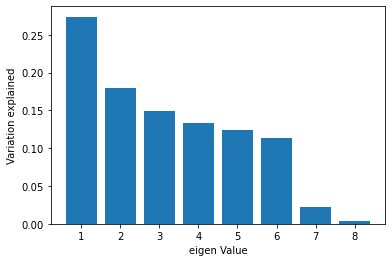

In [27]:
plt.bar(list(range(1,9)),PC.explained_variance_ratio_, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

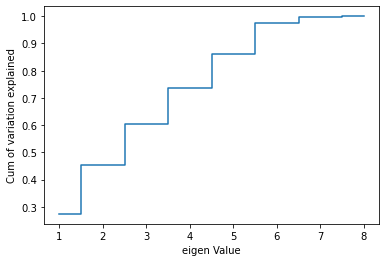

In [28]:
plt.step(list(range(1,9)),np.cumsum(PC.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [29]:
print("Varience Ratio covered by each componenet {}".format(PC.explained_variance_ratio_ * 100))
P_Components=PC.explained_variance_ratio_
print("The Ideal number of components that could explain {}% of variance in data is 5".format(np.sum(P_Components[0:6])*100))

Varience Ratio covered by each componenet [27.38139853 17.96036991 14.92087825 13.33690025 12.35875201 11.38606992
  2.27665426  0.37897687]
The Ideal number of components that could explain 97.34436887256159% of variance in data is 5


##### From the graphs above it is evident that 6 components capture just over 97% of data, rather than using all the features we can use just 6 major components on our models to train and predict.

Now we shall again capture the varience of the data for PCA components 6. This will allow us to train our models on both original data and PCA components seperately.

In [30]:
PCA6=PCA(n_components=6)
PCA6.fit(X_PCA)
X_PCA_6=PCA6.transform(X_PCA)
Y_PCA_6=Y_PCA

In [31]:
PCA6.explained_variance_

array([2.19291904, 1.43840853, 1.19498199, 1.06812449, 0.98978664,
       0.91188657])

In [32]:
PCA6.components_

array([[ 0.14788948,  0.26149352, -0.49728497,  0.52772773, -0.51739547,
        -0.02969488, -0.33043479, -0.0787015 ],
       [ 0.49076519, -0.62153477, -0.14630062, -0.15418981, -0.2196678 ,
         0.52826386, -0.00601931,  0.01768627],
       [ 0.64884871,  0.14447975, -0.09780579, -0.20323082,  0.43690378,
        -0.33247782, -0.36162283, -0.2739612 ],
       [-0.21817459,  0.26448276,  0.20691572, -0.11453479,  0.14638569,
         0.58948062, -0.67509227,  0.04301904],
       [ 0.20278732, -0.11825258,  0.16377376,  0.21225648,  0.07560651,
        -0.22065784, -0.21800324,  0.87811579],
       [ 0.03233999,  0.42716454, -0.58320018, -0.46650245,  0.07050061,
         0.19447555,  0.26664749,  0.3805859 ]])

#### As we have said earlier in multivariate analysis,  its time for us to explore the mix up of Gaussians in our data.

#### Cluster Analysis using Kfold(Centroid based) and Agglomerative(Hierarchial based) to explore gaussian mix.

In [33]:
from sklearn.cluster import KMeans,AgglomerativeClustering
k_values=range(1,10)
SSE=[]
for i in k_values:
    model=KMeans(n_clusters=i)
    model.fit(rev_data)
    SSE.append(model.inertia_)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

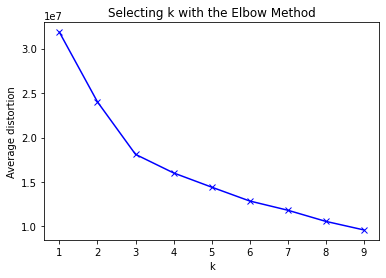

In [34]:
plt.plot(k_values, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#### Identify the number of clusters.

The elbow method is used to find the number of clusters required to group the data.

As you could see from the above graph, the bend is clearly visible at k=3, hence the ideal number of groups for this dataset is 3.

At k=0, the data is highly compressed, as the number of cluster increases the variance in data starts to change and at certain point the "Elbow Bends" in this case it is 3, we can preferably argue that is the ideal number of clusters in our data since it almost captures most of the variance. As K value keeps increasing after 3, you could see that each cluster becomes homogeneous and there is no change in variance.

In [35]:
rev_data=rev_data.apply(zscore)
K_Final=KMeans(n_clusters=3)
K_Final.fit(rev_data)
PRED=K_Final.predict(rev_data)
clusters=rev_data.copy()
clusters['K-Means-Grouping']=PRED
clusters.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,K-Means-Grouping
0,-1.292215,1.632569,-0.929175,1.195031,-1.151058,-0.060352,-0.361274,-0.145033,-0.261496,2
1,-1.019899,-0.339616,0.997994,-1.238215,0.912954,1.345483,0.272233,-0.637905,-0.664185,0
2,-0.219724,-0.829759,0.554575,0.328321,-0.099941,-0.252526,1.135503,-0.145033,-0.303785,0
3,-0.061859,0.494323,-0.929175,2.513936,-1.151058,-0.573676,-1.403839,-0.145033,0.745857,2
4,-1.159017,1.300387,-0.929175,0.645935,0.588064,0.914704,-1.049234,-0.145033,-0.993658,2
5,-0.170391,-0.829759,-0.929175,0.575953,-1.151058,-1.117953,2.248457,2.037686,-0.768329,2
6,-1.040618,2.076252,-0.929175,1.195031,-1.151058,-0.011342,-1.103686,-0.884341,-1.153976,2
7,-0.205910,-0.829759,0.904969,0.387538,0.072060,0.669650,-0.239089,0.840711,0.164546,0
8,0.234137,-0.829759,-0.929175,0.575953,-1.151058,1.399652,-0.142137,-0.145033,-0.781583,2
9,-1.157043,1.307356,1.287922,0.683618,0.568952,-1.244349,-1.018688,-0.145033,-0.318302,0


Agglomerative is a  connectivity based clustering technique , dendrogram and Cophentic Coefficient is used to identify the number of clusters

We are just comparing the clusters grouped by K means and Agglomertaive.

In [36]:
AG=AgglomerativeClustering()
AG.fit(rev_data)
clusters['Agglomerative labels']=AG.labels_
clusters.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,K-Means-Grouping,Agglomerative labels
0,-1.292215,1.632569,-0.929175,1.195031,-1.151058,-0.060352,-0.361274,-0.145033,-0.261496,2,1
1,-1.019899,-0.339616,0.997994,-1.238215,0.912954,1.345483,0.272233,-0.637905,-0.664185,0,0
2,-0.219724,-0.829759,0.554575,0.328321,-0.099941,-0.252526,1.135503,-0.145033,-0.303785,0,0
3,-0.061859,0.494323,-0.929175,2.513936,-1.151058,-0.573676,-1.403839,-0.145033,0.745857,2,1
4,-1.159017,1.300387,-0.929175,0.645935,0.588064,0.914704,-1.049234,-0.145033,-0.993658,2,0


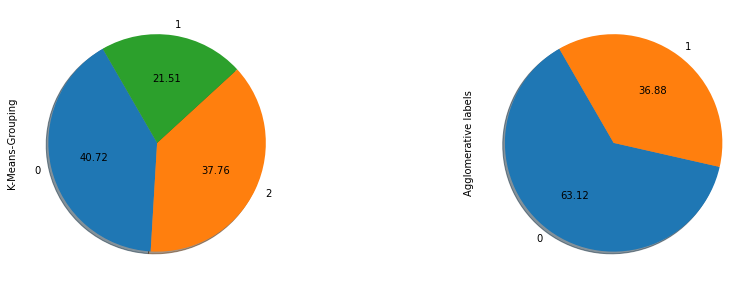

In [37]:
K_Means_group=clusters['K-Means-Grouping'].value_counts()
Agg_Group=clusters['Agglomerative labels'].value_counts()
fig,ax=plt.subplots(1,2,figsize=(15,5))
K_Means_group.plot.pie(shadow=True, startangle=120,autopct='%.2f',ax=ax[0])
Agg_Group.plot.pie(shadow=True, startangle=120,autopct='%.2f',ax=ax[1])

As you could see from the pie plot, K - Means has identified 3 clusters in our dataset whereas Agglomerative has identified 2 clusters. This is majorly because of the way K -Means(Centroid based) and Agglomerative(Hierarchial Based ) works.

We will compare the attributes based on the clusters for better understanding.

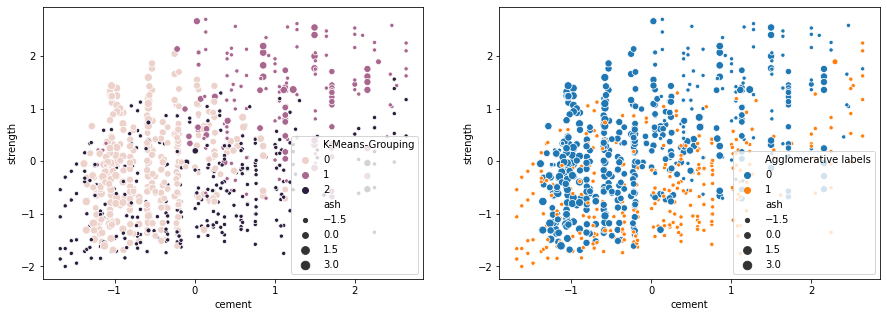

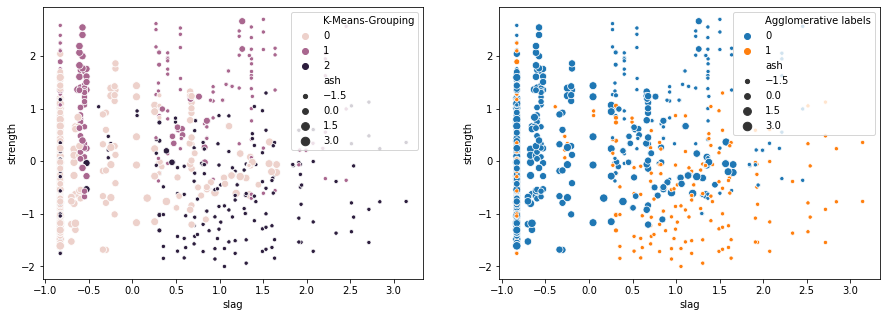

In [38]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['cement'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['cement'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['slag'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['slag'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);

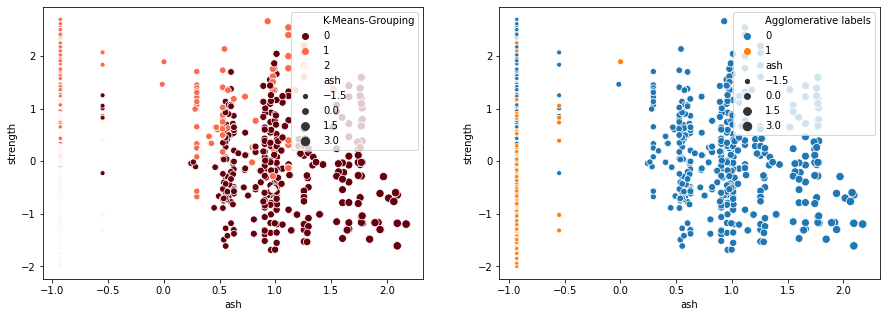

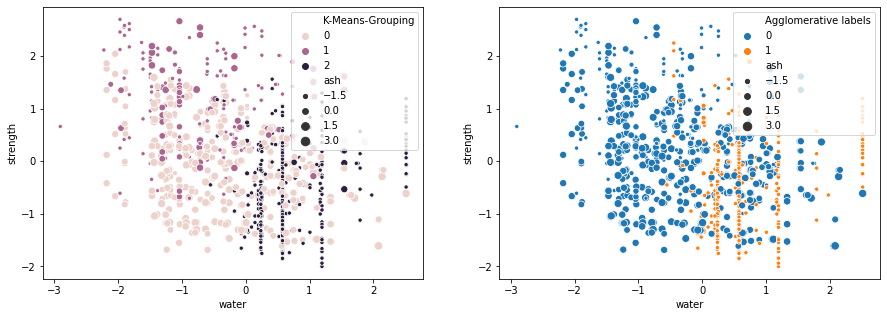

In [39]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['ash'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0],palette='Reds_r');
sns.scatterplot(clusters['ash'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['water'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['water'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);

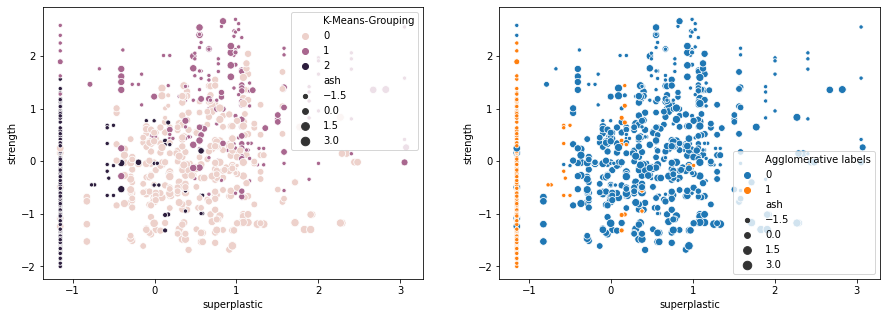

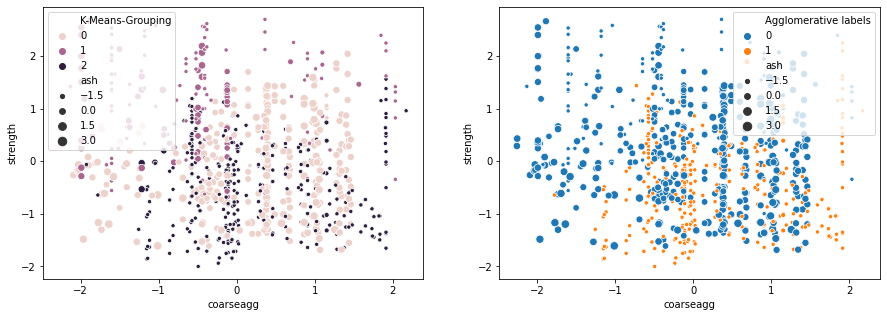

In [40]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['superplastic'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['superplastic'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['coarseagg'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['coarseagg'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);

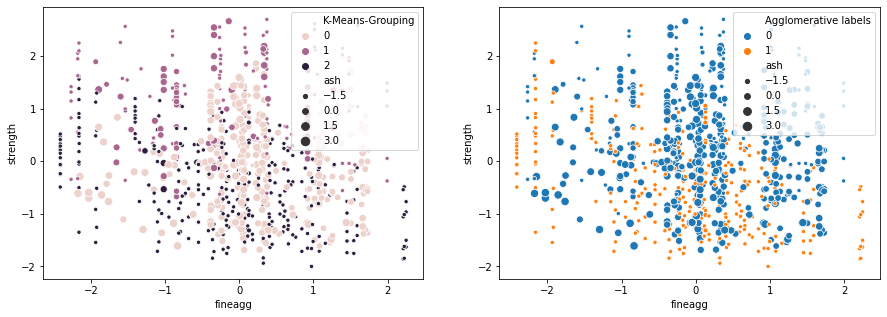

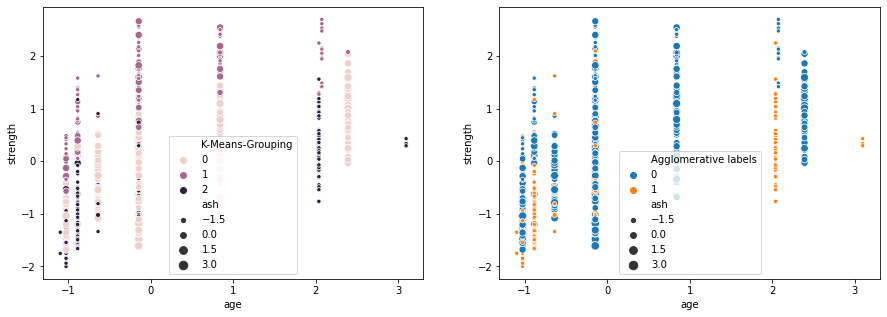

In [41]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['fineagg'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['fineagg'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(clusters['age'],clusters['strength'],hue=clusters['K-Means-Grouping'],size=clusters['ash'],ax=ax[0]);
sns.scatterplot(clusters['age'],clusters['strength'],hue=clusters['Agglomerative labels'],size=clusters['ash'],ax=ax[1]);

#### From the scatter plot analysis for all the variables with respect to strength we could see that the groupings formed through clustering  evidently prove that similar group of data have similar values.

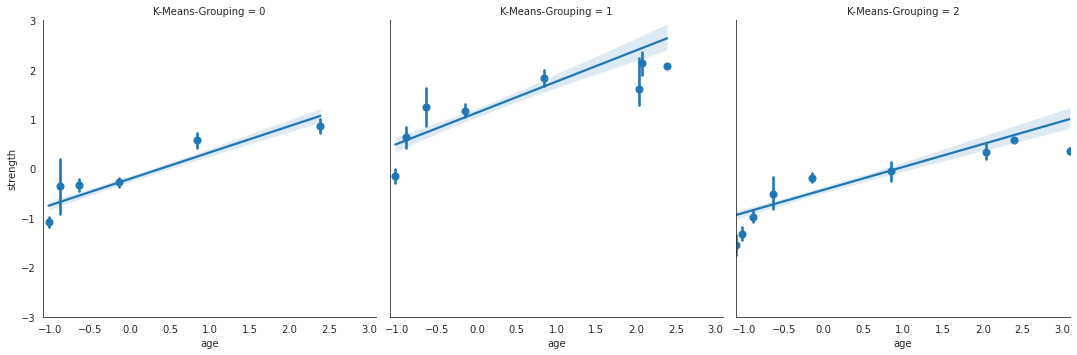

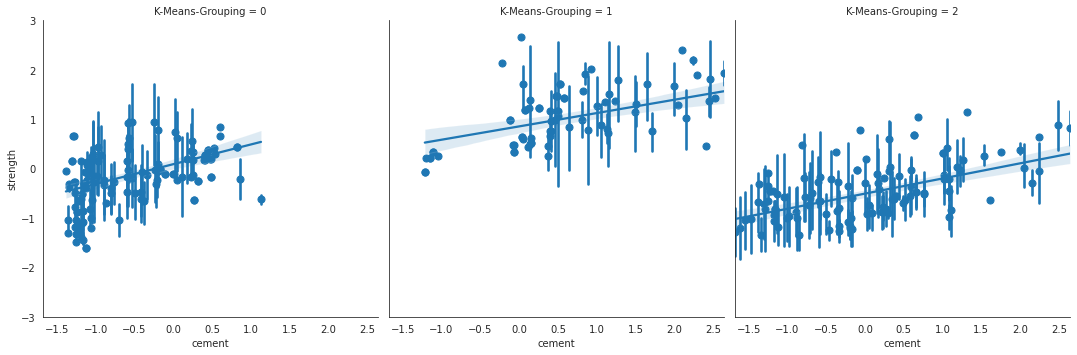

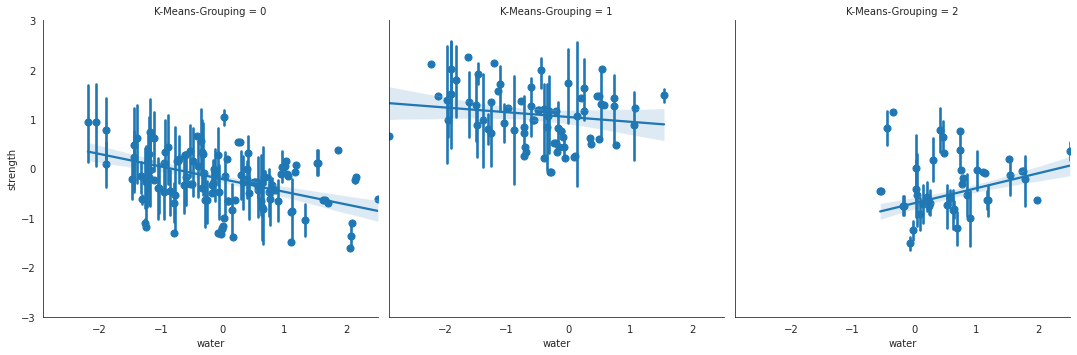

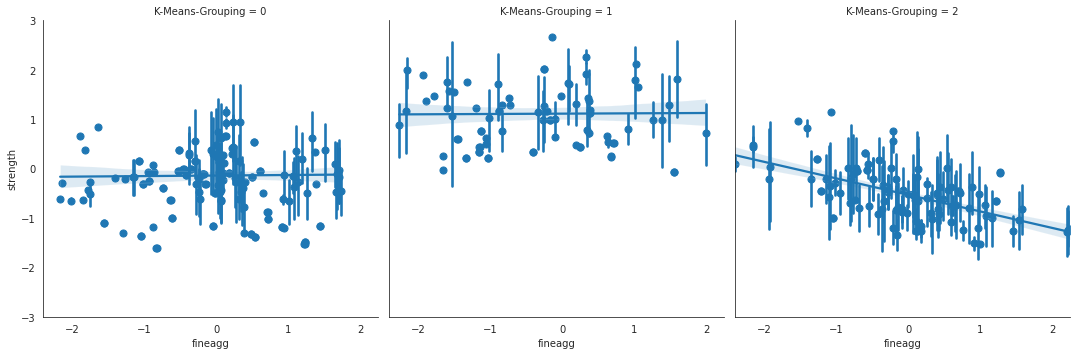

In [42]:
#fig,ax=plt.subplots(1,2,figsize=(15,5))
var = 'age'
var2='cement'
var3='water'
var4='fineagg'
var5='slag'
var6='ash'
var7='superplastic'
var8='coarseagg'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    plot1 = sns.lmplot(var2,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    plot2 = sns.lmplot(var3,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    plot3 = sns.lmplot(var4,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    
plot.set(ylim = (-3,3));
plot1.set(ylim=(-3,3));
plot2.set(ylim=(-3,3));
plot3.set(ylim=(-3,3));

### Cluster Analysis and their relationship with predictor(Concrete Strength)

1. From the Above plots for Age VS Strength it is very evident  and convincing that Age can be strong preditor in the strength of the concrete mix, As you can see for all the groups of clusters in age we see a strong positive linear relationship between age and strength. We can also infer that as the mixture ages the strength of the concrete increases.
    
    1.1. The Line of best fit is also around the mean and the residuals or error is also minimal
    
2. Cement seems to have little positive relationsip with strength , But may not be a strong predictor.

3. Water vs strength (Group 2 has some linear relation ship) whereas, group 0 and group 1 have a slight linear relationship. Hence, water also may not be a strong predictor of strength.

4. Fineagg, for group 0 and group 1 the line is almost horizontal, which means for value change in fineagg there is no considerable change in strength, But for group 3 there is some relationship for fineagg vs strength. Hence Fineagg may also not be good predictor of concrete strength.

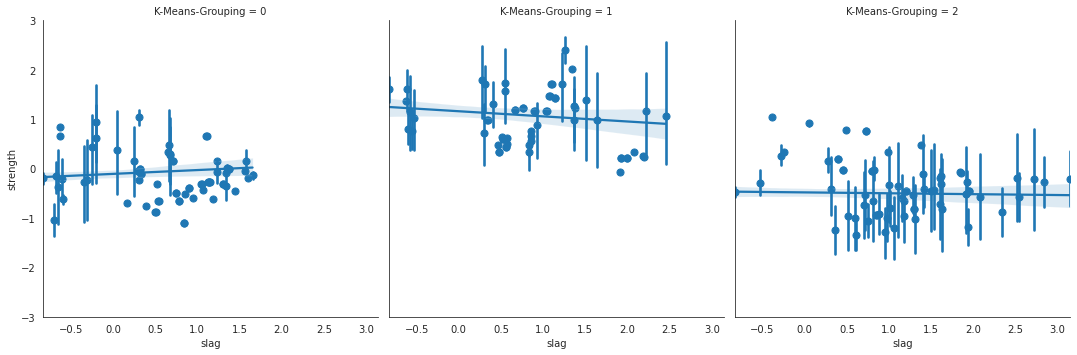

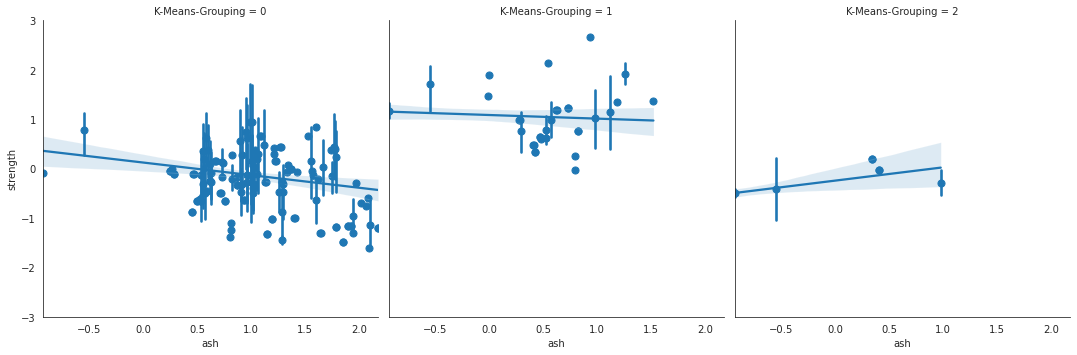

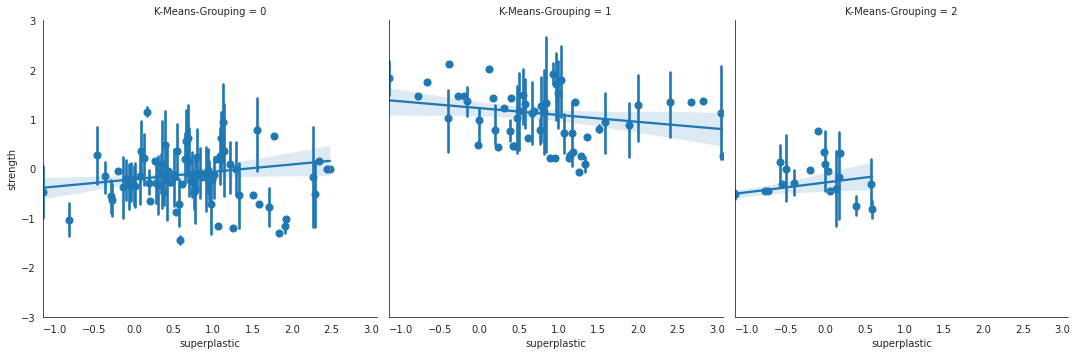

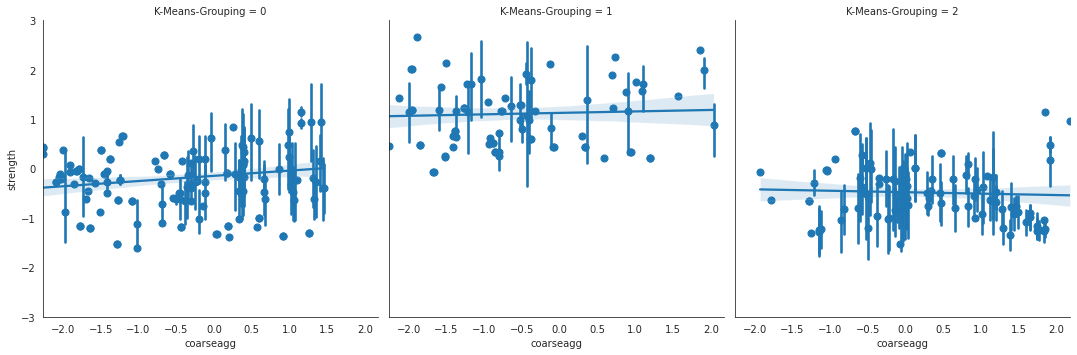

In [43]:
with sns.axes_style("white"):
    plot4 = sns.lmplot(var5,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    plot5 = sns.lmplot(var6,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    plot6 = sns.lmplot(var7,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
    plot7 = sns.lmplot(var8,'strength',data=clusters,col='K-Means-Grouping',x_estimator=np.mean)
plot4.set(ylim=(-3,3));
plot5.set(ylim=(-3,3));
plot6.set(ylim=(-3,3));
plot7.set(ylim=(-3,3));

### Cluster Analysis and their relationship with predictor(Concrete Strength)

1. Slag is almost horizontal for group 0 and group 2, group 1 has a slight relationship which makes slag not a great predictpr of strength.
2. Ash , suplerplastic and coarseagg all have horizontal data distribution on atleast one or more groups with strength also making them weak predictprs of strength.

### So from our cluster analysis , we could infer that age has a strong realationship with strength for data in all clusters

## Model Creation

### For this problem statement, Linear models seems to be a good fit, We are not just going to limit ourselves with linear regression, we are going to explore the linear and other models to see which performs best and going to select one.

#### Overview of the next phases :
1. Scale the data : Thus far we have been using only the raw data(Except PCA), But when it comes to ML algorithms unit of measurement plays a vital role in model performance. Hence, it is essential to scale the data to avoid one unit & magnitude outweigh the other. In this dataset, there are two units kgs and days, so we ll scale the data.
2. Split the data into training and test set with random state , to ensure the training model does not get to know the test data.
3. We will use all Linear model both Gradient descent based and tree based to evalute the performance on training and testing.
4. Explore Feature importance of models wherever applicable.
5. We will use both scaled raw data and PCA feature extracted data with feature number of features as 6, which we have done earlier.
6. Evaluate the scores on all the models on both original scaled data and PCA data and decide the best.
7. Perform Hyper parameter tuning using both Gridsearchcv and Random serach CV
8. Finially, do cross validation on the best model to evaluate the model performance on unseen data.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
X_SCALED=rev_data.drop(['strength'],axis=1)
Y_SCALED=rev_data['strength']

Split the data using train_test_split

In [45]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_SCALED,Y_SCALED,test_size=0.3,random_state=12)

In [46]:
M1_Linear_Model=LinearRegression()
M2_SVR=SVR()
M3_DTREE=DecisionTreeRegressor()
M4_RF=RandomForestRegressor()
M5_ADA=AdaBoostRegressor()
M6_BAG=BaggingRegressor()
M7_Gradient_Booster=GradientBoostingRegressor()

In [47]:
M1_Linear_Model.fit(X_Train,Y_Train)
M2_SVR.fit(X_Train,Y_Train)
M3_DTREE.fit(X_Train,Y_Train)
M4_RF.fit(X_Train,Y_Train)
M5_ADA.fit(X_Train,Y_Train)
M6_BAG.fit(X_Train,Y_Train)
M7_Gradient_Booster.fit(X_Train,Y_Train)

GradientBoostingRegressor()

Though we have done PCA to identify the features and their corresponding varience , We shall also list out the feature importances captured by each of the models and try to understand how effective is it in prediction of strength.

In [48]:
#Feature Importance from Decision Tree and RF
Features=(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age'])
Features_Linear_RAW=M1_Linear_Model.coef_
Features_DTREE_RAW=M3_DTREE.feature_importances_
features_RF_RAW=M4_RF.feature_importances_
summary={'FEATURES':Features,"Linear":Features_Linear_RAW,"Dtree":Features_DTREE_RAW,'Random Forest':features_RF_RAW}

FEATURES_DF=pd.DataFrame(summary)
FEATURES_DF

,FEATURES,Linear,Dtree,Random Forest
0,cement,0.664516,0.300349,0.319907
1,slag,0.402834,0.054970,0.066950
2,ash,0.224969,0.018456,0.017229
3,water,-0.306366,0.107533,0.101200
4,superplastic,0.049808,0.065561,0.077872
5,coarseagg,-0.078977,0.037847,0.035427
6,fineagg,-0.043009,0.042961,0.034770
7,age,0.553915,0.372324,0.346645


From the above table we could see that
1. Linear has different coefeficients for all features.
2. Decision Tree and Random forest's coefficients are similar.

In [49]:
#Predictions on RAW SCALED and Feature importances
Y_PRED_LINEAR_RAW=M1_Linear_Model.predict(X_Test)
Y_PRED_SVR_RAW=M2_SVR.predict(X_Test)
Y_PRED_DTREE_RAW=M3_DTREE.predict(X_Test)
Y_PRED_RF_RAW=M4_RF.predict(X_Test)
Y_PRED_ADA_RAW=M5_ADA.predict(X_Test)
Y_PRED_BAG_RAW=M6_BAG.predict(X_Test)
Y_PRED_GRD_RAW=M7_Gradient_Booster.predict(X_Test)

In [50]:
Training_M1_Linear=M1_Linear_Model.score(X_Train,Y_Train)* 100
Training_M2_SVR=M2_SVR.score(X_Train,Y_Train)* 100
Training_M3_DTREE=M3_DTREE.score(X_Train,Y_Train)* 100
Training_M4_RF=M4_RF.score(X_Train,Y_Train)* 100
Training_M5_ADA=M5_ADA.score(X_Train,Y_Train)* 100
Training_M6_BAG=M6_BAG.score(X_Train,Y_Train)* 100
Training_M7_Gradient=M7_Gradient_Booster.score(X_Train,Y_Train)* 100

Test_M1_Linear=M1_Linear_Model.score(X_Test,Y_Test)* 100
Test_M2_SVR=M2_SVR.score(X_Test,Y_Test)* 100
Test_M3_DTREE=M3_DTREE.score(X_Test,Y_Test)* 100
Test_M4_RF=M4_RF.score(X_Test,Y_Test)* 100
Test_M5_ADA=M5_ADA.score(X_Test,Y_Test)* 100
Test_M6_BAG=M6_BAG.score(X_Test,Y_Test)* 100
Test_M7_Gradient=M7_Gradient_Booster.score(X_Test,Y_Test)* 100

Split the PCA components using train_test_split with 6 features(n_components=6) to see how our models perfrom on the PCA components

In [51]:
X_pca_train,X_pca_test,Y_pca_train,Y_pca_test=train_test_split(X_PCA_6,Y_PCA_6,test_size=0.3,random_state=12)

In [52]:
M1_Linear_Model.fit(X_pca_train,Y_pca_train)
M2_SVR.fit(X_pca_train,Y_pca_train)
M3_DTREE.fit(X_pca_train,Y_pca_train)
M4_RF.fit(X_pca_train,Y_pca_train)
M5_ADA.fit(X_pca_train,Y_pca_train)
M6_BAG.fit(X_pca_train,Y_pca_train)
M7_Gradient_Booster.fit(X_pca_train,Y_pca_train)

GradientBoostingRegressor()

In [53]:
#Predictions on PCA SCALED and Feature importances
Y_PRED_LINEAR_PCA=M1_Linear_Model.predict(X_pca_test)
Y_PRED_SVR_PCA=M2_SVR.predict(X_pca_test)
Y_PRED_DTREE_PCA=M3_DTREE.predict(X_pca_test)
Y_PRED_RF_PCA=M4_RF.predict(X_pca_test)
Y_PRED_ADA_PCA=M5_ADA.predict(X_pca_test)
Y_PRED_BAG_PCA=M6_BAG.predict(X_pca_test)
Y_PRED_GRD_PCA=M7_Gradient_Booster.predict(X_pca_test)

In [54]:
Training_PCA_M1_Linear=M1_Linear_Model.score(X_pca_train,Y_pca_train)* 100
Training_PCA_M2_SVR=M2_SVR.score(X_pca_train,Y_pca_train)* 100
Training_PCA_M3_DTREE=M3_DTREE.score(X_pca_train,Y_pca_train)* 100
Training_PCA_M4_RF=M4_RF.score(X_pca_train,Y_pca_train)* 100
Training_PCA_M5_ADA=M5_ADA.score(X_pca_train,Y_pca_train)* 100
Training_PCA_M6_BAG=M6_BAG.score(X_pca_train,Y_pca_train)* 100
Training_PCA_M7_Gradient=M7_Gradient_Booster.score(X_pca_train,Y_pca_train)* 100

Test_PCA_M1_Linear=M1_Linear_Model.score(X_pca_test,Y_pca_test)* 100
Test_PCA_M2_SVR=M2_SVR.score(X_pca_test,Y_pca_test)* 100
Test_PCA_M3_DTREE=M3_DTREE.score(X_pca_test,Y_pca_test)* 100
Test_PCA_M4_RF=M4_RF.score(X_pca_test,Y_pca_test)* 100
Test_PCA_M5_ADA=M5_ADA.score(X_pca_test,Y_pca_test)* 100
Test_PCA_M6_BAG=M6_BAG.score(X_pca_test,Y_pca_test)* 100
Test_PCA_M7_Gradient=M7_Gradient_Booster.score(X_pca_test,Y_pca_test)* 100

Now, with all the score that we have stored in variables for Traing and Testing data on scaled raw and PCA featuures , we will create a table that will display the model scores as a dataframe.

In [55]:
DTREE_COEFF_PCA=M3_DTREE.feature_importances_
RF_COEFF_PCA=M4_RF.feature_importances_
ADA_COEFF_PCA=M5_ADA.feature_importances_
BAG_COEFF_PCA=M6_BAG.n_features_

In [56]:
TAB=pd.DataFrame({'Model_Names':['Linear Regression','Support Vector Regressor','Decision Tree Regressor','Random Forest Regressor',
            'Adaboost Regressor','Bagging Regressor','Gradient Boost'],'Training_Score_Scaled_Raw':[Training_M1_Linear,
Training_M2_SVR,
Training_M3_DTREE,
Training_M4_RF,
Training_M5_ADA,
Training_M6_BAG,
Training_M7_Gradient],'Testing_Score_Scaled_Raw':[Test_M1_Linear,
Test_M2_SVR,
Test_M3_DTREE,
Test_M4_RF,
Test_M5_ADA,
Test_M6_BAG,
Test_M7_Gradient],'Training_Score_PCA':[Training_PCA_M1_Linear,
Training_PCA_M2_SVR,
Training_PCA_M3_DTREE,
Training_PCA_M4_RF,
Training_PCA_M5_ADA,
Training_PCA_M6_BAG,
Training_PCA_M7_Gradient],'Testing_Score_PCA':[Test_PCA_M1_Linear,
Test_PCA_M2_SVR,
Test_PCA_M3_DTREE,
Test_PCA_M4_RF,
Test_PCA_M5_ADA,
Test_PCA_M6_BAG,
Test_PCA_M7_Gradient]})

In [57]:
TAB

,Model_Names,Training_Score_Scaled_Raw,Testing_Score_Scaled_Raw,Training_Score_PCA,Testing_Score_PCA
0,Linear Regression,76.881242,73.062252,73.171641,69.787749
1,Support Vector Regressor,91.916079,83.300309,88.478367,79.177840
2,Decision Tree Regressor,99.872046,77.287712,99.872046,73.790210
3,Random Forest Regressor,98.400000,87.121870,97.384485,83.871971
4,Adaboost Regressor,83.043022,74.220010,79.388447,67.141255
5,Bagging Regressor,98.041660,84.264215,96.214847,80.322666
6,Gradient Boost,95.449788,86.433027,92.631616,81.162592


#### Linear model hasn't performed that great on both raw as well as PCA components, the scores are not that accurate.

#### Decision tree is a overfit, as it prodces 99% accuracy with trainiing and with test it chokes to 77% and 74% with raw and PCA components, hence it is not the best model.

#### Random forest and Gradient boost seems to be slightly overfit, but looks like it generalises well on the test data on both raw and PCA.



In [69]:
print("Best Test score we have achived on Raw Data:",TAB['Testing_Score_Scaled_Raw'].max())
print("Best Test score we have achived on PCA components:",TAB['Testing_Score_PCA'].max())

Best Test score we have achived on Raw Data: 87.121869588778
Best Test score we have achived on PCA components: 83.87197067285123


Though Random forest had better score , I am slecting Gradient boost here as the best model , as I feel it generalises well compared to training and testing scores.

#### So , we'll do hyper parameter tuning on Gradient boost by  Grid search to squeeze that extra performance out of the model without making it overfit or underfit.

#### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

In [70]:
#Regularization using GridsearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### GridSearchCV

Every Algorithm has some parameters that are specific to data and some specific to the algorithm , Those parameters which  are specific to algorithm is known as hyperparameters.
We shall try various values for these hyperparameters to find which set of values give the best result for the model.

In [60]:
param_grid={'n_estimators':[100,200,300,400,500,600],'learning_rate':[.001,0.01,.1],
            'max_depth':[1,2,3,4,5],'subsample':[.5,.75,1],'random_state':[1]}

In [61]:
estimator=M7_Gradient_Booster
Grid_CV=GridSearchCV(estimator=estimator,param_grid=param_grid,cv=10)

In [62]:
Grid_CV.fit(X_Train,Y_Train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500, 600],
                         'random_state': [1], 'subsample': [0.5, 0.75, 1]})

In [63]:
Grid_CV.best_estimator_

GradientBoostingRegressor(max_depth=2, n_estimators=600, random_state=1,
                          subsample=0.75)

The above are the best estimators for our grid search model and we shall use these values for on our final model to check how our scores are improved.

In [64]:
Grid_CV.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 600,
 'random_state': 1,
 'subsample': 0.75}

### Now lets train our best model with best hyperparameters found using GridSearch

In [65]:
Final=GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=600,random_state=1,subsample=0.75)

In [66]:
Final.fit(X_Train,Y_Train)
Final.score(X_Train,Y_Train) * 100

97.5402778651533

In [67]:
Final.score(X_Test,Y_Test) * 100

90.76216045393369

#### As you can see, the training and the test scores of Gradient boost has improved and parameter tuning allows us to build better model
Training score without tuning 95%, Testing score without tuning 86 
Training score with hyperparameter tuning 98, Testing score with hyperparameter tuning 91%

### Model performance range at 95% confidence level 

#### Having bulit the model on hyperparametrs and evaluating them on training and test set does not guarntee the same performance of our model on unseen data.

#### Hence, it is essential to further do a final evaluation on unseen data. We shall do the same using K fold cross validation 

In [71]:
from sklearn.model_selection import cross_val_score,KFold

In [72]:
K=10
seed=12
kfold_Linear=KFold(shuffle=True,n_splits=K,random_state=seed)
accuracies = cross_val_score(estimator = Final, X = X_SCALED, y = Y_SCALED, cv = kfold_Linear) 
accuracies
print("K Fold score mean:{}".format(accuracies.mean()*100))
print("K Fold score standard deviation:{}".format(accuracies.std()*100))

K Fold score mean:92.43162528906795
K Fold score standard deviation:2.127804423517341


# Conclusion- "Time to hit the Road"

The hyperparameters tuned model produces a accuracy score of 92.43  % on 10 fold cross validation with a standard deviation of 2.12.

So , I conclude that when this model is deployed on unseen data we could get a accuracy of range 90.31% to 94.55%.
This score is pretty good and can be trusted at 95% confidence Intravel.